In [1]:
# Import Section
import csv
import codecs
import sys
import io
import numpy as np
import pandas as pd
import scipy as sp

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statistics import mean


from sklearn import tree
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge

# Python script for confusion matrix creation. 
from sklearn.metrics import *
from numpy import mean
from numpy import std
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_excel("Des_cod_1056_92-29.xlsx",index_col=0)

In [3]:
dataset.shape

(1056, 30)

In [4]:
# to check the null values 
dataset.isnull().sum()

Number of atoms                                                   0
Relative number of N  atoms                                       0
Relative number of Cl atoms                                       0
Wiener index                                                      0
Kier&Hall index (order 3)                                         0
Average Information content (order 0)                             0
Balaban index                                                     0
Max partial charge for a N  atom [Zefirov's PC]                   0
Min partial charge for a N  atom [Zefirov's PC]                   0
Polarity parameter / square distance                              0
PPSA-3 Atomic charge weighted PPSA [Zefirov's PC]                 0
PNSA-3 Atomic charge weighted PNSA [Zefirov's PC]                 0
RNCS Relative negative charged SA (SAMNEG*RNCG) [Zefirov's PC]    0
LUMO energy                                                       0
LUMO+1 energy                                   

In [5]:
x = dataset.drop(['Act'],axis=1).astype (float)
y = dataset['Act']

In [6]:
x

,Number of atoms,Relative number of N atoms,Relative number of Cl atoms,Wiener index,Kier&Hall index (order 3),Average Information content (order 0),Balaban index,Max partial charge for a N atom [Zefirov's PC],Min partial charge for a N atom [Zefirov's PC],Polarity parameter / square distance,...,Min net atomic charge for a N atom,Max net atomic charge for a C atom,Tot dipole of the molecule,Image of the Onsager-Kirkwood solvation energy,RNCS Relative negative charged SA (SAMNEG*RNCG) [QC PC],Max SIGMA-SIGMA bond order,Max PI-PI bond order,Min valency of a N atom,Avg valency of a N atom,Min (0.1) bond order of a N atom
Structure,,,,,,,,,,,,,,,,,,,,,
"""1Co""",101.0,0.0297,0.0198,26631.0,9.9558,1.6397,0.8438,-0.0893,-0.0926,0.1809,...,-0.4922,0.2878,9.4339,0.1088,0.3086,0.9950,0.9488,3.1423,3.2054,0.2697
"""2Co""",107.0,0.0280,0.0187,29652.0,10.4813,1.6785,0.9663,-0.0893,-0.0924,0.1626,...,-0.5047,0.2677,8.7587,0.0907,0.2536,0.9962,0.9470,3.1279,3.1937,0.2686
"""3Co""",113.0,0.0265,0.0177,32339.0,10.8588,1.6722,0.8453,-0.0892,-0.0923,0.1809,...,-0.4981,0.2876,9.3381,0.0998,0.2020,0.9960,0.9490,3.1339,3.2001,0.2607
"""4Co""",104.0,0.0288,0.0192,28065.0,10.1517,1.6509,0.8427,-0.0893,-0.0926,0.1809,...,-0.4933,0.2872,9.2435,0.1027,0.1485,0.9951,0.9489,3.1410,3.2049,0.2687
"""5Co""",110.0,0.0273,0.0182,31138.0,10.6903,1.6850,0.9670,-0.0893,-0.0924,0.1626,...,-0.5049,0.2648,8.4606,0.0832,0.2797,0.9962,0.9471,3.1275,3.1930,0.2680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""1052Co""",86.0,0.0349,0.0233,17187.0,8.0898,1.7691,0.9049,-0.0892,-0.0923,0.1752,...,-0.4897,0.3161,9.7498,0.1395,0.3712,0.9947,0.9671,3.1652,3.1986,0.2608
"""1053Co""",74.0,0.0405,0.0270,13291.0,7.1869,1.7552,0.8931,-0.0893,-0.0926,0.1752,...,-0.4864,0.3158,10.0471,0.1614,0.6300,0.9946,0.9681,3.1698,3.2042,0.2656
"""1054Co""",80.0,0.0375,0.0250,15195.0,7.7123,1.7671,0.8967,-0.0893,-0.0924,0.1752,...,-0.4876,0.3160,9.8221,0.1476,0.4963,0.9955,0.9677,3.1676,3.2025,0.2633


In [7]:
y

Structure
"1Co"       0.853
"2Co"       0.987
"3Co"       0.773
"4Co"       0.760
"5Co"       0.893
            ...  
"1052Co"    0.370
"1053Co"    1.020
"1054Co"    0.832
"1055Co"    0.701
"1056Co"    1.090
Name: Act, Length: 1056, dtype: float64

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2, random_state = 47, shuffle=True)

In [9]:
x_test.shape

(212, 29)

In [10]:
x_train.shape

(844, 29)

In [11]:
# scealing is required for indepandent variables at ANN
#from sklearn.preprocessing import StandardScaler

In [12]:
regressor = tree.DecisionTreeRegressor( min_samples_split= 2, min_samples_leaf=10,
                   max_leaf_nodes= 60, max_features= 'auto', max_depth= None, criterion= 'friedman_mse', splitter = 'best', 
                                       random_state=42)
  #regressor = ElasticNet(random_state=0)
  #regressor = KernelRidge(alpha=1.0)

In [13]:
import time
from datetime import timedelta
start_time = time.monotonic()

In [14]:
 regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_features='auto',
                      max_leaf_nodes=60, min_samples_leaf=10, random_state=42)

In [15]:
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

0:00:00.313000


In [16]:
# compute the testing accuracy
y_pred = regressor.predict(x_test)

In [17]:
y_pred_train = regressor.predict(x_train)

In [18]:
  print("\n")
  print("overall Performance: ", )



overall Performance: 


In [19]:
  # model evaluation for testing set
  mae = metrics.mean_absolute_error(y_test, y_pred)
  mse = metrics.mean_squared_error(y_test, y_pred)
  r2 = metrics.r2_score(y_test, y_pred)

In [20]:
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.2109318784719894
MSE is 0.10969245920747511
R2 score is 0.5798521120488361


In [21]:
  # model evaluation for training set
maeTrain = metrics.mean_absolute_error(y_train, y_pred_train)
mseTrain = metrics.mean_squared_error(y_train, y_pred_train)
r2Train = metrics.r2_score(y_train, y_pred_train)

In [22]:
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(maeTrain))
print('MSE is {}'.format(mseTrain))
print('R2 score is {}'.format(r2Train))

The model performance for training set
--------------------------------------
MAE is 0.15239937360257869
MSE is 0.05647377988926205
R2 score is 0.7554664009469272


In [23]:
cvscoretrain = (cross_val_score(regressor,x_train,y_train.ravel(),cv=5).mean())

In [24]:
print("The CV score for training set")
print("--------------------------------------")
print (cross_val_score(regressor,x_train,y_train.ravel(),cv=5))
print('Q2 is {}'.format(cvscoretrain))

The CV score for training set
--------------------------------------
[0.41515717 0.24904501 0.4425137  0.22113603 0.37847718]
Q2 is 0.34126581564853575


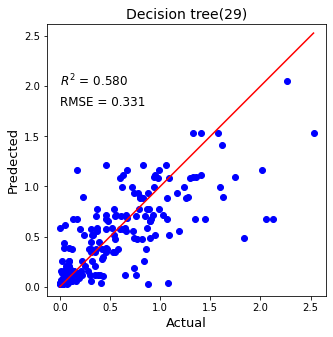

In [25]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='blue', marker='o')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'red')
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('equal')
plt.text(0, 2, '$R^2$ = 0.580', fontsize = 12)
plt.text(0, 1.8, 'RMSE = 0.331', fontsize = 12)
plt.title('Decision tree(29)', fontsize = 14)
plt.show()

In [26]:
import statsmodels.api as sm

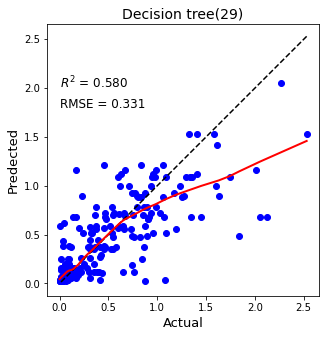

In [29]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='blue', marker='o', linewidth=1)
plt.yscale('linear')
plt.xscale('linear')


p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], c='black', linestyle='dashed')
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('scaled')
plt.text(0, 2, '$R^2$ = 0.580', fontsize = 12)
plt.text(0, 1.8, 'RMSE = 0.331', fontsize = 12)
plt.title('Decision tree(29)', fontsize = 14)

# Draw a Loess best-fit line over the scatter plot
lowess = sm.nonparametric.lowess
loess_fit = lowess(y_pred, y_test, frac=0.3)
# Plot the loess fit line on the scatter plot
plt.plot(loess_fit[:, 0], loess_fit[:, 1], 'r-', linewidth=2)

plt.show()


In [172]:
#Randomize search CV
from sklearn.model_selection import RandomizedSearchCV

In [151]:
# creatting parameter gride
param_grid_regressor= {'criterion': ["mse", "friedman_mse", "mae"],
                       'splitter':["best", "random"], 
                       "max_depth":[1,2,3,4,5,6,None],
    'min_samples_split': [ 2, 3, 4, 5], 'min_samples_leaf':[20, 40, 70, 80, 90, 100],
                      "max_leaf_nodes": [5, 20, 100],  'max_features': ["None","auto", "sqrt"], } 
             

In [152]:
regressor_random = RandomizedSearchCV(estimator = regressor, param_distributions=param_grid_regressor, n_iter = 100,
                              cv = 5, verbose =2,
                              n_jobs= -1, scoring = 'neg_mean_squared_error' )

In [153]:
regressor_random.fit (x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.15285785         nan -0.25580019 -0.19846996         nan -0.20818329
 -0.161544   -0.23187112 -0.16184287         nan -0.25556514 -0.18313502
 -0.1746989          nan -0.18611122         nan -0.22557794         nan
 -0.15587363         nan -0.17339321         nan -0.25556514         nan
 -0.19895696 -0.23918145 -0.15550527         nan -0.16184287         nan
         nan -0.15832874 -0.24450466 -0.23107016         nan         nan
         nan -0.16637788 -0.16560842 -0.16510559         nan         nan
 -0.15130519 -0.18356005 -0.1927004  -0.1713188  -0.18083246         nan
         nan -0.16208455         nan -0.21370874         nan -0.19442008
 -0.17434377 -0.16728388 -0.16398212 -0.16856634 -0.25534173 -0.19779231
         nan         nan         nan -0.15832874 -0.25556514 -0.15550527
 -0.19506396 -0.23704601 -0.25534173 -0.18083246 -0.15781064 -0.183

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeRegressor(max_features='auto',
                                                   max_leaf_nodes=60,
                                                   min_samples_leaf=10,
                                                   random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, None],
                                        'max_features': ['None', 'auto',
                                                         'sqrt'],
                                        'max_leaf_nodes': [5, 20, 100],
                                        'min_samples_leaf': [20, 40, 70, 80, 90,
                                                             100],
                                        'min_samples_split': [2, 3, 4, 5],

In [154]:
regressor_random.best_params_

{'splitter': 'best',
 'min_samples_split': 2,
 'min_samples_leaf': 70,
 'max_leaf_nodes': 20,
 'max_features': 'auto',
 'max_depth': None,
 'criterion': 'friedman_mse'}

In [155]:
regressor_random.best_score_

-0.14984856237077732

In [156]:
# parameter tuning grid searchCV
from sklearn.model_selection import GridSearchCV

In [157]:
# creatting parameter gride
param_grid_regressor= {'criterion': ["mse", "mae"], "max_depth":[2,3,4,5,6,None],
    'min_samples_split': [ 2, 3, 4, 5, 6, 7], 'min_samples_leaf':[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60],
                      "max_leaf_nodes": [10,20, 30, 40,50, 60],  'max_features': ["None","auto", "sqrt"],}

In [158]:
regressor_grid = GridSearchCV(estimator =regressor, param_grid=param_grid_regressor,
                              cv = 5, verbose =2,
                              n_jobs= -1,  scoring = "neg_mean_squared_error")

regressor_grid.fit (x_train ,y_train)

Fitting 5 folds for each of 14256 candidates, totalling 71280 fits


C:\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan ... -0.15958684 -0.15958684
 -0.15958684]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_features='auto',
                                             max_leaf_nodes=60,
                                             min_samples_leaf=10,
                                             random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 3, 4, 5, 6, None],
                         'max_features': ['None', 'auto', 'sqrt'],
                         'max_leaf_nodes': [10, 20, 30, 40, 50, 60],
                         'min_samples_leaf': [10, 15, 20, 25, 30, 35, 40, 45,
                                              50, 55, 60],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]},
             scoring='neg_mean_squared_error', verbose=2)

In [159]:
regressor_grid.best_params_

{'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': 60,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [160]:
regressor_grid.best_score_

-0.11926465825517996